# CV quantum gate visualizations

*Author: Brianna Gopaul*

In a conventional quantum circuit, qubits represented by wires are operated on by quantum gates which collectively perform computations. Similarily, continuous variable quantum computing uses qumodes that represent bundles of interacting photons. To perform computations on qumodes, we leverage Gaussian and non-Gaussian gates. 

Gaussian and non-Gaussian gates can be described within the phase space. This space is shown by the position and momentum axes.
    
Gaussian gates such as the squeezing and rotation gate act linearly on modes. These gates can only reach positive quasi-probability distributions and can be classically simulated. On the other hand, non-Gaussian gates such as the Kerr gate and Cubic Phase gate act nonlinearly. This property allows them to be in negative quasi-probability distributions and not be classically simulated.
    
__In this notebook, we'll learn about various single mode Gaussian and non-Gaussian gates and apply them to a state using Strawberry Fields.__

In [1]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Vacuum State

The vacuum state is the lowest energy Gaussian state. It has no displacement or squeezing in phase space.

Here we learn how to create the vacuum state on a quantum circuit with one qumode. 

We initialize the Strawberry Fields program. `q` represents a qumode and below we start with one qumode for our circuit. 

In [2]:
prog = sf.Program(1)

We declare our quantum circuit using the engine. We can prepare the Vacuum state on one qumode using `|`. 

In [3]:
with prog.context as q:
    Vac | q[0]
    
eng = sf.Engine('gaussian')
state = eng.run(prog).state

It should be noted that the default state in strawberry fields is the vacuum state. The above gate is listed to show the operation. 

In Strawberry Fields, there are three main backends that can be used to perform computations. The backend selected will depend on the task you want to perform. Above, we've used the Gaussian backend to run our vacuum state circuit. We can also alternatively use the Fock backend to run the circuit. <pr>The third backend is the tensorflow backend 'tf'. It leverages tensorflow to create quantum machine learning models. 

Using matplotlib, we then plot the Wigner function of the vacuum state, which is a Gaussian distribution. The Wigner function quasi-probability illustrates negative and positive regions in phase space. We'll notice below that Gaussian states such as the vacuum and squeezed state are in positive regions of phase space while non-Gaussian states can reach negative regions of the phase space. The y-axis on this plot can describe the $\hat {p}$ quadrature or momentum operator and the x-axis describes the $\hat{x}$ quadrature or position operator of the state. 



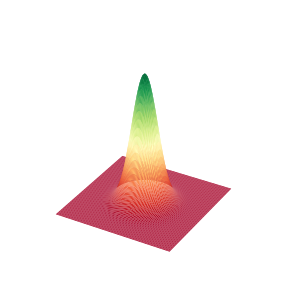

In [4]:
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P) 
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

We can make a couple of observations from the Gaussian distribution above. We notice that it has positive quasi-probability everywhere. Later on, we'll have a look at non-Gaussian gates that have regions of negative quasi-probability. The vacuum state is also centered at 0 on both the position axis $\hat {x}$ and momentum axis $\hat {p}$. 

## Squeezing Gate

The squeezing gate can also be thought of as a transformation on the position and momentum axes. The squeezing gate scales $x$ to $e^{ - r}\hat{x} _\phi$ and scales $p$ with $e^{r}\hat{p} _\phi$. In the Wigner function, we can see the probability distribution being lengthened on the momentum axis and being pinched on the position axis. As the squeezing gate is a Gaussian gate, there are no regions of negative quasi-probabilty.  

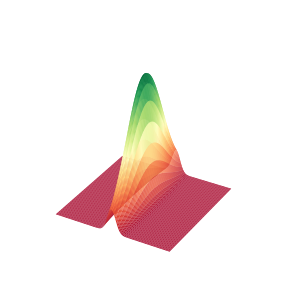

In [5]:
prog = sf.Program(1)
with prog.context as q:
    S = Sgate(1)
    S | q[0]


state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P) 
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
fig.set_size_inches(4.8, 5)
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
ax.set_axis_off()

The below animation shows the squeezing gate acting on the vacuum state with increasing strengths of parameters.
![squeezing](gifs/squeezinggif.gif)

## Rotation Gate

The rotation gate shifts the $\hat{x}$ quadrature to $\hat{x}$ $\cos \phi$ - $\hat{p}\sin$ $\phi$ and $\hat{p}$ to $\hat{p}$ $\cos \phi$ + $\hat{x}\sin$  $\phi$. In other words, the gate simply rotates the phase space. 

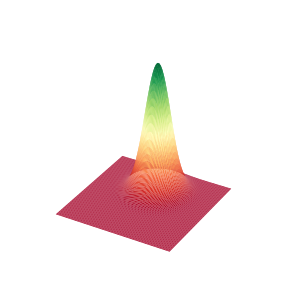

In [8]:
prog = sf.Program(1)
with prog.context as q:
    Dgate(1) | q[0]
    Rgate(np.pi/2) | q[0]

eng.reset()
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P) 
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

Above we apply the rotation gate to a coherent state. When compared to the squeezed state in the previous example, the rotation gate simply makes a rotation. 

Similarily, the rotation gate is applied with an increasing parameter in the below animation. 
![rotation](gifs/rotation.gif)

## Displacement Gate 

The displacement gate has a specified complex value $\alpha$. It shifts $\hat{x}$ by a value porportional to $Re(\alpha)$ and the $\hat {p}$ by a value $Im({\alpha})$. 

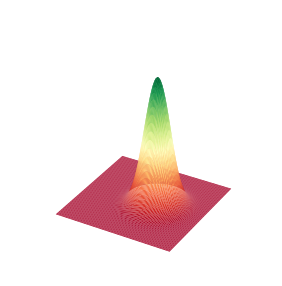

In [9]:
prog = sf.Program(1)
with prog.context as q:
    Dgate(0.55) | q[0]
    
eng.reset()
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P) 
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

As $\alpha$ increases in value, the state is displaced more to the right. 
![disp](gifs/displacementgif.gif)

## Cubic Phase Gate 

The cubic phase gate shifts $\hat{p}$ by $\gamma\hat{x}^2$ where $\gamma$ is a definable parameter but does not transform $\hat{x}$ in the phase space. Below, we decide to set $\gamma=2$.  

When running a circuit that contains any non-Gaussian gates, we use the Fock backend. Depending on the backend used, different arguments will have to be called. In this example, we define 'cutoff_dim' which tells Strawberry Fields where to limit the Fock space. 

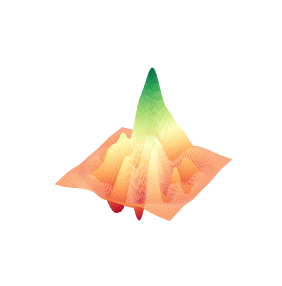

In [18]:
prog = sf.Program(1)
with prog.context as q:
    gamma = 2
    Vgate(gamma) | q[0]
    
#We use the fock backend and define the argument cutoff_dim
eng = sf.Engine('fock', backend_options={"cutoff_dim": 10})
state = eng.run(prog).state

fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P) 
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

Here we can see that the vacuum state has been shifted to a state where it reaches negative quasi-probability distributions.
![cubic](gifs/cubicphasegif.gif)

## Kerr Gate 

Before we understand how the Kerr gate operates, we should first take another look at the rotation gate. In the Fock basis, the rotation gate acts with $e^{ i\phi \hat{n}}$. In comparison, the Kerr gates transforms with $e^{ i\phi k \hat{n}^2}$. The $^2$ value is what makes this state non-Gaussian and thus transforms the shape of the state significantly. 

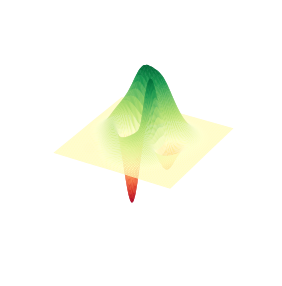

In [25]:
prog = sf.Program(1)
with prog.context as q:
    kappa = 1
    Dgate(1) | q[0]
    Kgate(kappa) | q[0]

eng.reset()
state = eng.run(prog).state

fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P) 
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

In the below Wigner function, the state is initially in a coherent state.
![kerr](gifs/kerrgif.gif)

 We can see it's coherent structure morphing after the Kerr gate is applied at different strengths.

For more information about CV gates, see [the CV gates section](https://strawberryfields.readthedocs.io/en/latest/conventions/gates.html) in the Strawberry Fields documentation.